# **Data Analytics Assignment**

## Understanding of the dataset

- Dataset contains rows that represent a patient's healthcare record and employment information
  
- Dataset contains columns that represent:
  1) Id
  2) Gender
  3) Age
  4) Hypertension
  5) Heart_disease
  6) Ever_married
  7) Work_type
  8) Residence_type
  9) Avg_glucose_level
  10) Bmi
  11) Smoking_status
  12) Stroke, respectively, for each booking entry
---
- **Id** represents the patient's id number which is a unique identifier to keep track of the patients.
  
- **Gender** represents the gender of the patient.
  
- **Age** represents patient's age.
  
- **Hypertension** represents a value that indicates whether the patient suffers from hypertension or not.
  
- **Heart_disease** represents a value that indicates whether the patient suffers from heart disease or not.
  
- **Ever_married** represents a value that indicates whether the patient was at some point in the past married or not.
  
- **Work_type** represents the patient's work type: private, self-employed, govt. job, etc. 
  
- **Residence_type** represents the patient's residence type: urban, rural, etc.
  
- **Avg_glucose_level** represents the patient's average glucose levels.
  
- **Bmi** represents the patient's body mass index.

- **Smoking_status** represents whether the patient is a smoker, was formerly a smoker, has never smoked, etc.

- **Stroke** represents a value that indicates whether the patient had a stroke or not.
---

## Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

## Importing the dataset

In [9]:
dataset = pd.read_csv('../Data/healthcare-dataset-stroke-data.csv')

## Displaying the first 5 rows of the dataset

In [10]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Exploring the data

### Total number of records in the dataset

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- The dataset contains 5110 rows and 12 columns. 
- Among these, 'id', 'hypertension', 'heart_disease' and 'stroke' are integers. 
- 'gender', 'ever_married', 'work_type', 'residence_type' and 'smoking_status' are strings. 
- 'age', 'avg_glucose_level' and 'bmi' are floating-point numbers.

### Dropping the Id Attribute

In [12]:
dataset = dataset.drop(columns=['id'])
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


- The 'id' attribute is of not much use here because a patient's id, has nothing to do with whether the patient will suffer a stroke or not.

### Displaying the null counts for each column 

In [13]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- Most of the columns have no null values. 
- The 'bmi' column contains 201 null values.

### Percentage of null values in the dataset

In [14]:
dataset['bmi'].isnull().sum() * 100 / len(dataset['bmi'])

3.9334637964774952

- The percentage of null values in the 'bmi' column compared to non-null values that column is appx. 4% which is less than 5%. 
- It may be safe to drop these particular records containing null values in case bmi doesn't play a major role in contributing to a person getting stroke.
- But, it may be safer to fill in these null values with an mean value considering all the remaining bmi values or, the most frequently occuring bmi value. 

### Using KNNImputer to replace the null values with some good values

In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dataset['bmi'] = imputer.fit_transform(dataset[['bmi']])

- Here KNNInputer is used because of the uncertainty in whether there is a dependency between 'bmi' and other attributes. So something like SimpleImputer may not be appropriate here.
- KNNInputer, takes into account the relationships between features. I chose the neighbours as 5 rather than 1 because making n_neighbours=1 will make it more succeptible to outliers.

### Constructing 2 new features from existing ones

In [16]:
0.2 in range(0, 1)

False

Constructing Age Groups from Age

In [17]:
def age_to_age_group(age):
    if 0 < age < 1:
        return 'Infant'
    elif 1 <= age < 3:
        return 'Toddler'
    elif 3 <= age < 5:
        return 'Preschooler'
    elif 5 <= age < 12:
        return 'School-age child'
    elif 12 <= age < 18:
        return 'Adolescent'
    elif 18 <= age < 25:
        return 'Young Adult'
    elif 25 <= age < 65:
        return 'Adult'
    elif age >= 65:
        return 'Senior'

dataset['age_group'] = dataset.apply(lambda row: age_to_age_group(row['age']), axis=1)

Constructing BMI Categories from BMI

In [18]:
def bmi_to_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    elif 30 <= bmi <= 34.9:
        return 'Obese-1'
    elif 35 <= bmi <= 39.9:
        return 'Obese-2'
    elif bmi >= 40:
        return 'Obese-3'
    
dataset['bmi_category'] = dataset.apply(lambda row: bmi_to_bmi_category(row['bmi']), axis=1)

### Plotting graphs for each attribute

Count plot of Gender and Stroke sufferers

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

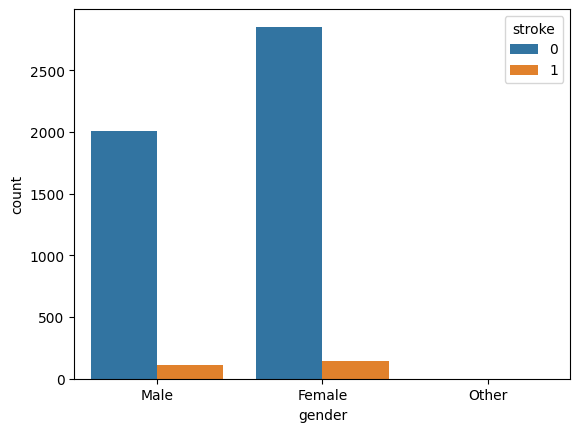

In [19]:
print(dataset['gender'].value_counts())
seaborn.countplot(data=dataset, x='gender', hue='stroke')

- from this gender v/s count graph it can be seen that the count of stroke suffers is about the same and doesn't depend on the gender of the person.

Histogram plot for Age and Stroke sufferers

age
0.08       2
0.16       3
0.24       5
0.32       5
0.40       2
        ... 
78.00    102
79.00     85
80.00     70
81.00     60
82.00     56
Name: count, Length: 104, dtype: int64


<Axes: xlabel='age', ylabel='Count'>

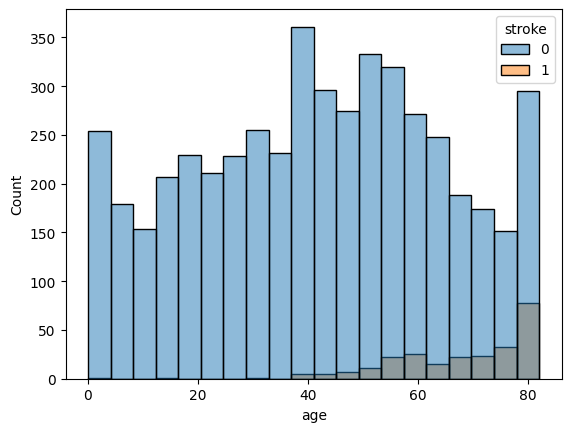

In [20]:
print(dataset['age'].value_counts().sort_index())
seaborn.histplot(data=dataset, x='age', hue='stroke')

<Axes: xlabel='age'>

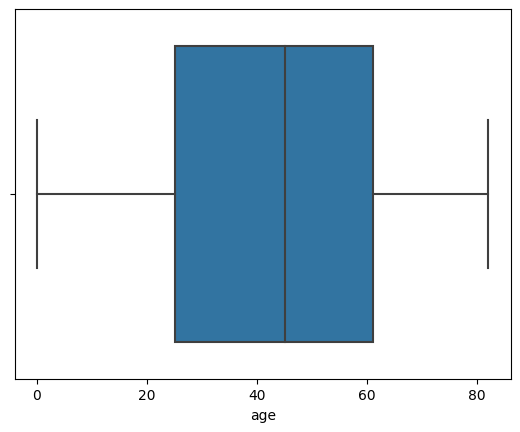

In [21]:
seaborn.boxplot(data=dataset, x='age', hue='stroke')

- It can be seen from the above graph that as people progress in age, they are more likely to suffer a stroke.
- This is indicated by the rising of stroke count towards the older ages. There are no outliers here.

Count plot for Hypertension and Stroke sufferers

hypertension
0    4612
1     498
Name: count, dtype: int64


<Axes: xlabel='hypertension', ylabel='count'>

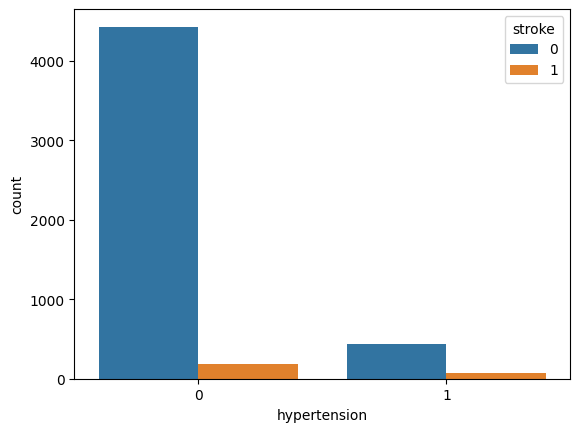

In [22]:
print(dataset['hypertension'].value_counts())
seaborn.countplot(data=dataset, x='hypertension', hue='stroke')

- It can be seen that people suffering from hypertension as well as people not suffering from it have had stroke.

Count plot for Heart_disease and Stroke sufferers

heart_disease
0    4834
1     276
Name: count, dtype: int64


<Axes: xlabel='heart_disease', ylabel='count'>

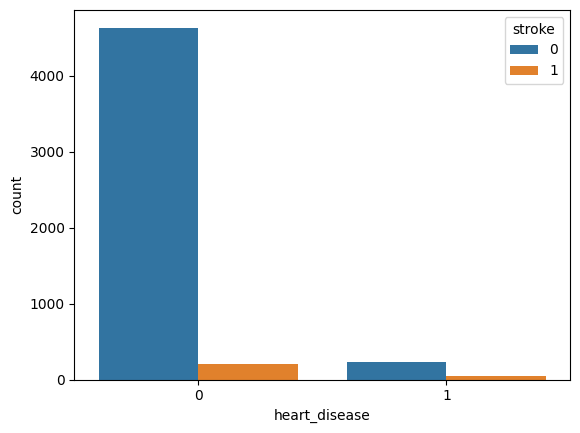

In [23]:
print(dataset['heart_disease'].value_counts())
seaborn.countplot(data=dataset, x='heart_disease', hue='stroke')

- It cannot be concluded that heart disease leads to a higher chance of suffering from a stroke because people who do not have heart disease have also suffered from a stroke.

Count plot for Ever_married and Stroke sufferers

ever_married
Yes    3353
No     1757
Name: count, dtype: int64


<Axes: xlabel='ever_married', ylabel='count'>

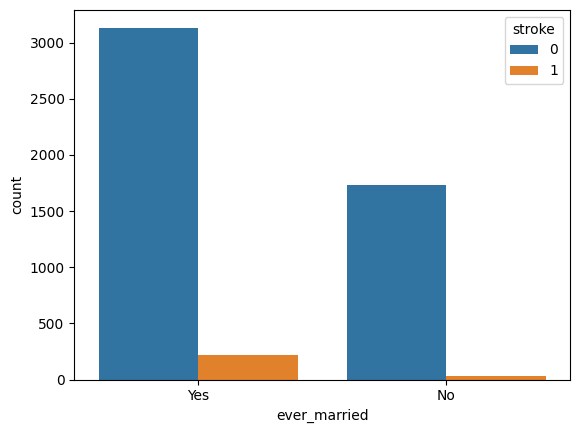

In [24]:
print(dataset['ever_married'].value_counts())
seaborn.countplot(data=dataset, x='ever_married', hue='stroke')

- It can be seen that number of people who suffered a stroke was higher on the side who said they are/were married in the past. 
- It can also be seen that the number of people who suffered a stroke was lower on the side who said they've never been married.
- This may not neccessarily indicate that marriage leads to stroke though. It maybe the case that age is playing a factor here.
- Most people who are young, are not usually married. Majority of people who are older are more likely to be married.
- Hence there may not be a relationship between marriage status and stroke directly, but it still needs further investigation because marriage may lead to other contributing factors indirectly, for eg. stress of supporting your family and kids, which may not necessarily be present in younger people.

Count plot for Work_type and Stroke sufferers

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


<Axes: xlabel='work_type', ylabel='count'>

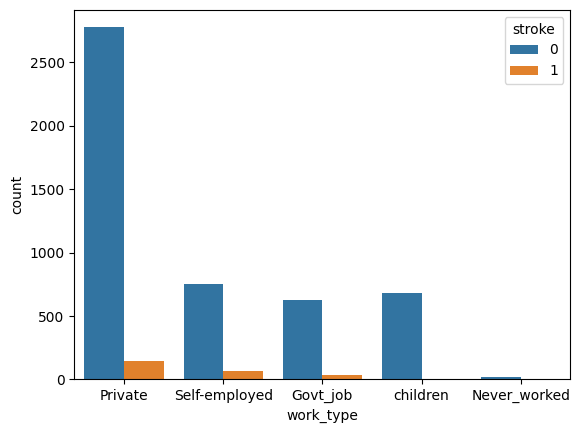

In [25]:
print(dataset['work_type'].value_counts())
seaborn.countplot(data=dataset, x='work_type', hue='stroke')

- There is not much that can said about the type of work a person does and them suffering a stroke.
- The number of people in private work is more, so the number of people who've suffered a stroke is also consquently more.
- But comparing self-employed people to people having government jobs, the stroke cases on self-employed side was more, compared to government jobs side.
- However, it can be observed that people who's work involve children had almost no cases of stroke.
- There might not a strong link between work type and stroke, although some sort of weak effects may exist. It needs further investigation.

Count plot for Residence_type and Stroke sufferers

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


<Axes: xlabel='Residence_type', ylabel='count'>

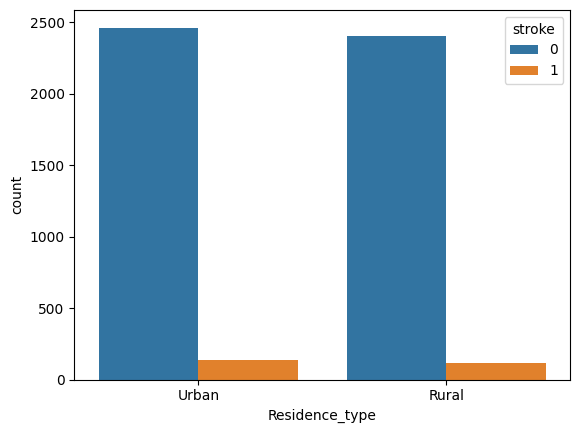

In [26]:
print(dataset['Residence_type'].value_counts())
seaborn.countplot(data=dataset, x='Residence_type', hue='stroke')

- People who live in urban areas are as likely to suffer a stroke as people in rural areas.

Histogram plot for Avg_glucose_level and Stroke sufferers

avg_glucose_level
55.12     1
55.22     1
55.23     1
55.25     1
55.26     1
         ..
266.59    1
267.60    1
267.61    1
267.76    1
271.74    1
Name: count, Length: 3979, dtype: int64


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

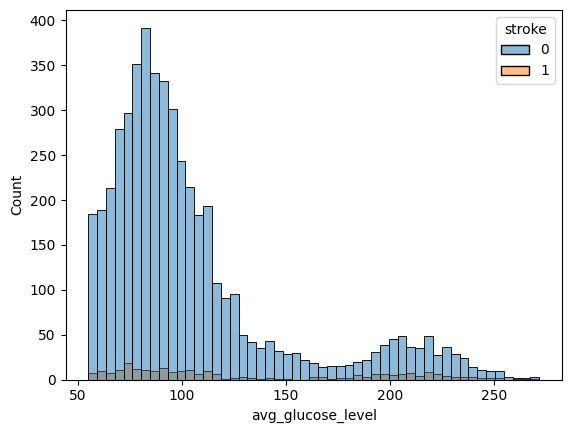

In [27]:
print(dataset['avg_glucose_level'].value_counts().sort_index())
seaborn.histplot(data=dataset, x='avg_glucose_level', hue='stroke')

<Axes: xlabel='avg_glucose_level'>

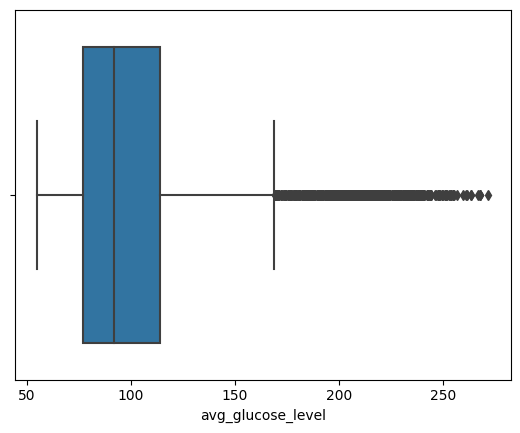

In [28]:
seaborn.boxplot(data=dataset, x='avg_glucose_level', hue='stroke')

- People who have an average glucose level of around 100 and above are likely to suffer a stroke.
- As can be seen from the box plot, there are some outliers present as well, that needs to be dealt with.
- The avg_glucose_level count follows a skewed distribution, so IQR based method can be applied to remove outliers.

Histogram plot for Bmi and Stroke sufferers

bmi
14.900000      1
47.100000      1
46.400000      1
14.000000      1
45.800000      1
            ... 
26.700000     37
27.600000     37
28.400000     38
28.700000     41
28.893237    201
Name: count, Length: 419, dtype: int64


<Axes: xlabel='bmi', ylabel='Count'>

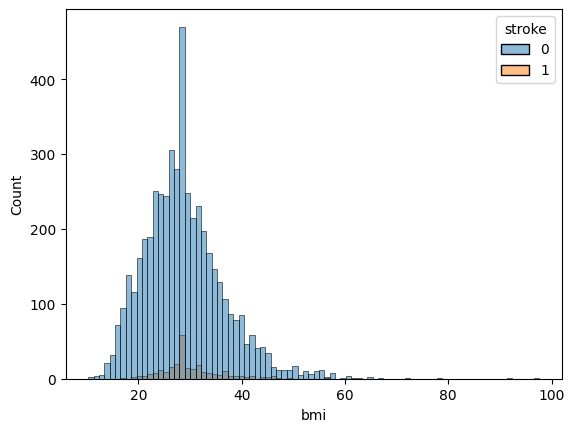

In [29]:
print(dataset['bmi'].value_counts().sort_values())
seaborn.histplot(data=dataset, x='bmi', hue='stroke')

<Axes: xlabel='bmi'>

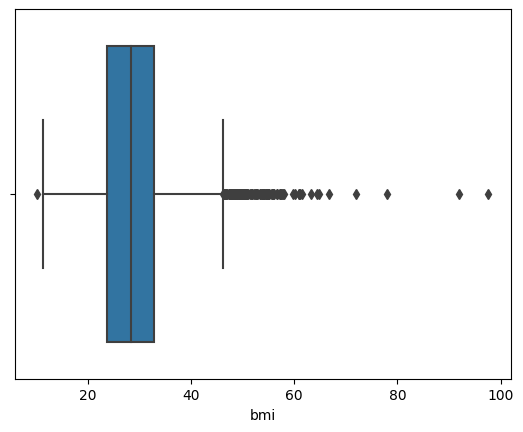

In [30]:
seaborn.boxplot(data=dataset, x='bmi', hue='stroke')

- Not much can be said about BMI making a person more likely to suffer a stroke. However, as can be seen from the box plot, there are some outliers present, that needs to be dealt with.
- The bmi count follows a skewed distribution, so IQR based method can be applied to remove outliers.

Count plot for Smoking_status and Stroke sufferers

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


<Axes: xlabel='smoking_status', ylabel='count'>

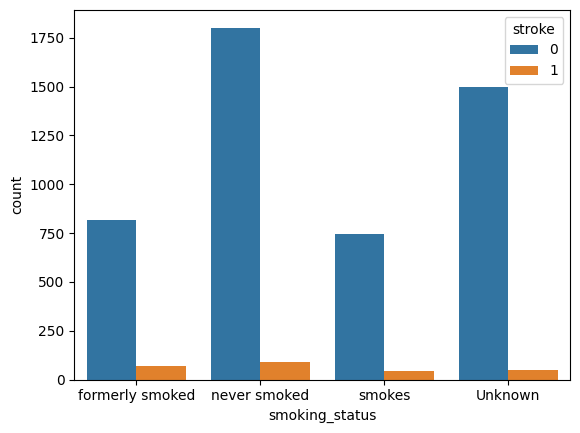

In [31]:
print(dataset['smoking_status'].value_counts())
seaborn.countplot(data=dataset, x='smoking_status', hue='stroke')

- Not much can be said about smoking status making a person more likely to suffer a stroke. 

Count plot for Age_group and Stroke sufferers

age_group
Adult               2847
Senior              1027
Young Adult          380
Adolescent           313
School-age child     288
Toddler              132
Preschooler           80
Infant                43
Name: count, dtype: int64


<Axes: xlabel='age_group', ylabel='count'>

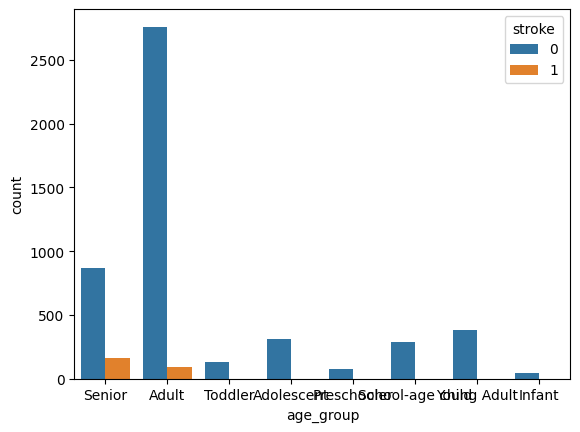

In [32]:
print(dataset['age_group'].value_counts())
seaborn.countplot(data=dataset, x='age_group', hue='stroke')

- Its clear that the risk for stroke is higher in the Senior age group and adults, compared to the younger age groups

Count plot for Bmi_category and Stroke sufferers

bmi_category
Overweight     1610
Normal         1243
Obese-1        1000
Obese-2         506
Obese-3         414
Underweight     337
Name: count, dtype: int64


<Axes: xlabel='bmi_category', ylabel='count'>

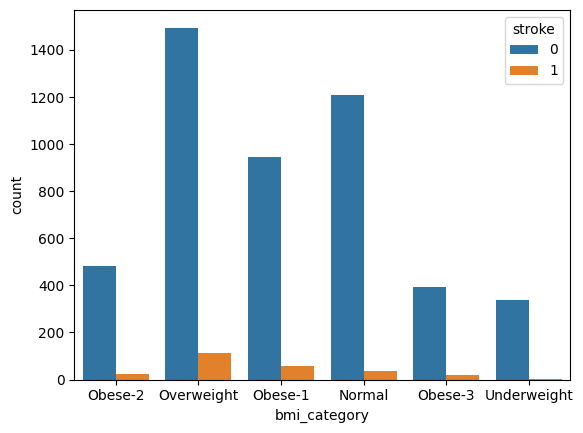

In [33]:
print(dataset['bmi_category'].value_counts())
seaborn.countplot(data=dataset, x='bmi_category', hue='stroke')

- Higher risk for overweight and obese-1 categories followed by normal category. 
- Underweight having least risk.

## Constructing Health Risk Factor feature based on the above plots and analysis

In [34]:
def health_risk_factor(age_cat, bmi_cat, hypertension, work_type, avg_glucose_lvl, smoking_stats):
    risk = 0
    if age_cat in ['Senior', 'Adult']:
        risk += 1
    if bmi_cat == 'Overweight':
        risk += 1
    if bmi_cat == 'Obese-1':
        risk += 1
    if bmi_cat == 'Normal':
        risk += 0.5
    if hypertension == 1:
        risk += 0.3
    if work_type == 'Private':
        risk += 0.5
    if work_type == 'Self-employed':
        risk += 0.2
    if avg_glucose_lvl > 100:
        risk += 0.2
        if avg_glucose_lvl > 200:
            risk += 0.2
    if smoking_stats in ['formerly smoked', 'never smoked']:
        risk += 0.2
    return risk


dataset['health_risk_factor'] = dataset.apply(lambda row: health_risk_factor(row['age_group'], row['bmi_category'], row['hypertension'], row['work_type'], row['avg_glucose_level'], row['smoking_status']), axis=1)

### Mean, Median and Standard Deviation of the dataset

In [35]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,health_risk_factor
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,1.941135
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320,0.821700
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,1.500000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000,2.200000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,2.600000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,3.400000


## Outlier Removal

### Functions for Removing Outliers

In [36]:
def remove_outliers(dataset, col):
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    dataset = dataset[dataset[col] > lower_limit]
    dataset = dataset[dataset[col] < upper_limit]
    return dataset

### From Avg_glucose_level

In [37]:
dataset = remove_outliers(dataset, 'avg_glucose_level')

dataset.shape

(4483, 14)

Boxplot

<Axes: xlabel='avg_glucose_level'>

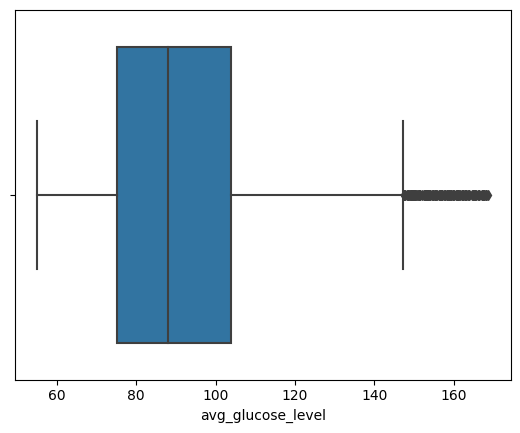

In [38]:
seaborn.boxplot(data=dataset, x='avg_glucose_level', hue='stroke')

### From Bmi

In [39]:
dataset = remove_outliers(dataset, 'bmi')

dataset.shape

(4383, 14)

Boxplot

<Axes: xlabel='bmi'>

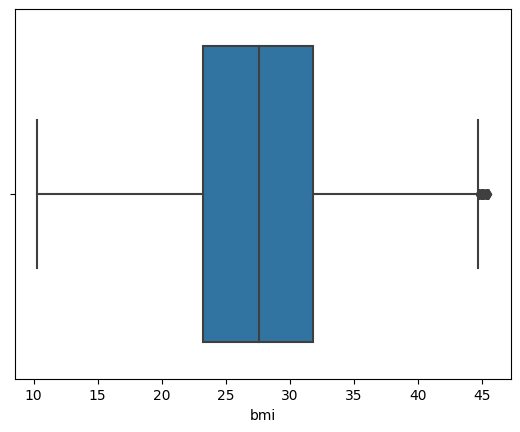

In [40]:
seaborn.boxplot(data=dataset, x='bmi', hue='stroke')

## Encoding the categorial columns

In [41]:
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
married_encoder = LabelEncoder()
work_encoder = LabelEncoder()
residence_encoder = LabelEncoder()
smoking_encoder = LabelEncoder()
age_group_encoder = LabelEncoder()
bmi_category_encoder = LabelEncoder()

dataset['gender'] = gender_encoder.fit_transform(dataset['gender'])
dataset['ever_married'] = married_encoder.fit_transform(dataset['ever_married'])
dataset['work_type'] = work_encoder.fit_transform(dataset['work_type'])
dataset['Residence_type'] = residence_encoder.fit_transform(dataset['Residence_type'])
dataset['smoking_status'] = smoking_encoder.fit_transform(dataset['smoking_status'])
dataset['age_group'] = age_group_encoder.fit_transform(dataset['age_group'])
dataset['bmi_category'] = bmi_category_encoder.fit_transform(dataset['bmi_category'])

dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category,health_risk_factor
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,5,1,2.9
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1,5,4,3.0
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1,5,0,2.2
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1,1,4,2.5
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1,5,0,2.0


## Feature Scaling

### Max, Min values of the dataset

In [42]:
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category,health_risk_factor
count,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000
mean,0.410449,40.893762,0.074378,0.039243,0.622861,2.201916,0.507643,91.476126,27.770010,1.344285,0.037417,2.502624,2.180014,1.874287
std,0.492435,22.565008,0.262415,0.194194,0.484725,1.110744,0.499999,22.663253,6.521408,1.084882,0.189804,2.223978,1.803375,0.828414
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,0.000000,2.000000,0.000000,75.075000,23.200000,0.000000,0.000000,1.000000,0.000000,1.400000
50%,0.000000,42.000000,0.000000,0.000000,1.000000,2.000000,1.000000,88.040000,27.600000,2.000000,0.000000,1.000000,2.000000,2.100000
75%,1.000000,58.000000,0.000000,0.000000,1.000000,3.000000,1.000000,104.025000,31.800000,2.000000,0.000000,5.000000,4.000000,2.500000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,168.680000,45.500000,3.000000,1.000000,7.000000,5.000000,3.200000


### Normalization

In [43]:
cols = dataset.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

dataset = pd.DataFrame(dataset, columns=cols)
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category,health_risk_factor
count,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000
mean,0.205225,0.498215,0.074378,0.039243,0.622861,0.550479,0.507643,0.320149,0.496307,0.448095,0.037417,0.357518,0.436003,0.585715
std,0.246218,0.275452,0.262415,0.194194,0.484725,0.277686,0.499999,0.199571,0.185267,0.361627,0.189804,0.317711,0.360675,0.258879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.279785,0.000000,0.000000,0.000000,0.500000,0.000000,0.175722,0.366477,0.000000,0.000000,0.142857,0.000000,0.437500
50%,0.000000,0.511719,0.000000,0.000000,1.000000,0.500000,1.000000,0.289891,0.491477,0.666667,0.000000,0.142857,0.400000,0.656250
75%,0.500000,0.707031,0.000000,0.000000,1.000000,0.750000,1.000000,0.430653,0.610795,0.666667,0.000000,0.714286,0.800000,0.781250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Saving the preprocessed file to csv

In [44]:
dataset.to_csv('preprocessed_dataset.csv')
dataset.dtypes

gender                float64
age                   float64
hypertension          float64
heart_disease         float64
ever_married          float64
work_type             float64
Residence_type        float64
avg_glucose_level     float64
bmi                   float64
smoking_status        float64
stroke                float64
age_group             float64
bmi_category          float64
health_risk_factor    float64
dtype: object